In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Process

In [2]:
ds = pd.read_csv('C:/Users/hp/Downloads/cars24data.csv')

In [3]:
ds.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [5]:
ds.isnull().sum()

Model Name            0
Price                 0
Manufacturing_year    0
Engine capacity       0
Spare key             0
Transmission          0
KM driven             0
Ownership             0
Fuel type             0
Imperfections         0
Repainted Parts       0
dtype: int64

In [6]:
import datetime

# Get current year
current_year = datetime.datetime.now().year

# Calculate Age of the Car
ds['Age'] = current_year - ds['Manufacturing_year']

# Price per KM
ds['Price_per_KM'] = ds['Price'] / ds['KM driven']

# Price per Engine Capacity
ds['Price_per_Engine_Capacity'] = ds['Price'] / ds['Engine capacity']

# Age per KM
ds['Age_per_KM'] = ds['Age'] / ds['KM driven']

# Price bins and categories
bins = [100000, 250000, 400000, 600000, 800000, 1000000]
labels = ['Low', 'Medium', 'High', 'Very High', 'Luxury']

ds['Price_Category'] = pd.cut(ds['Price'], bins=bins, labels=labels, include_lowest=True)
print(ds['Price_Category'].value_counts())


Price_Category
High         626
Medium       330
Very High    313
Luxury        73
Low           60
Name: count, dtype: int64


## Outlier Analysis

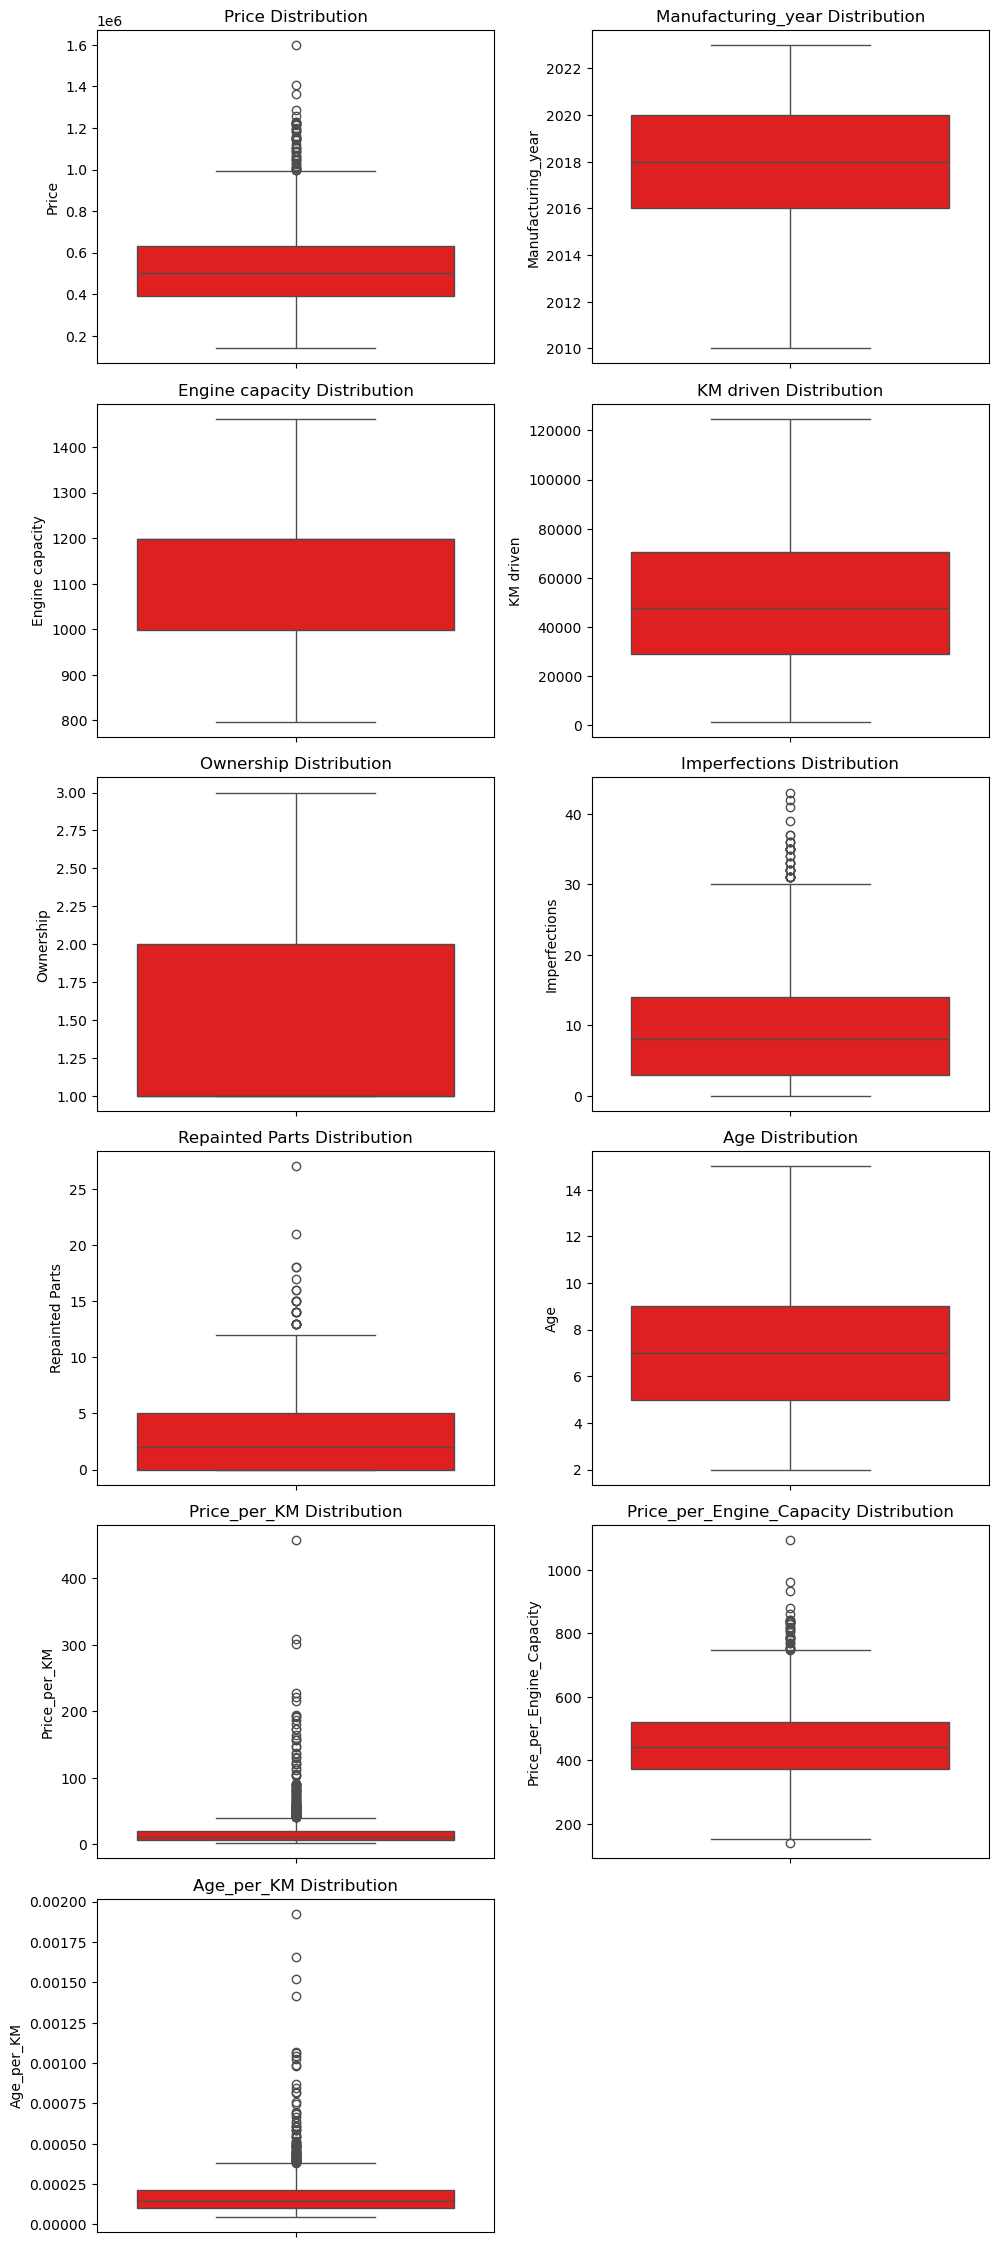

In [8]:
# Outlier Detection and Handling
numeric_cols = ds.select_dtypes(include=["int64", "float64"]).columns

# Boxplot for outlier visualization
plt.figure(figsize=(10, 30))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(ds[col], color="red")
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

In [15]:
# Function to remove outliers using IQR
def remove_outliers(ds):
    for column in ds.columns:
        Q1 = ds[column].quantile(0.25)
        Q3 = ds[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        ds[column] = np.where(ds[column] < lower_limit, lower_limit, ds[column])
        ds[column] = np.where(ds[column] > upper_limit, upper_limit, ds[column])
    return ds

C:\Users\hp\AppData\Local\Temp\ipykernel_18648\2032680847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[column] = np.where(ds[column] < lower_limit, lower_limit, ds[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_18648\2032680847.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[column] = np.where(ds[column] > upper_limit, upper_limit, ds[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_18648\2032680847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

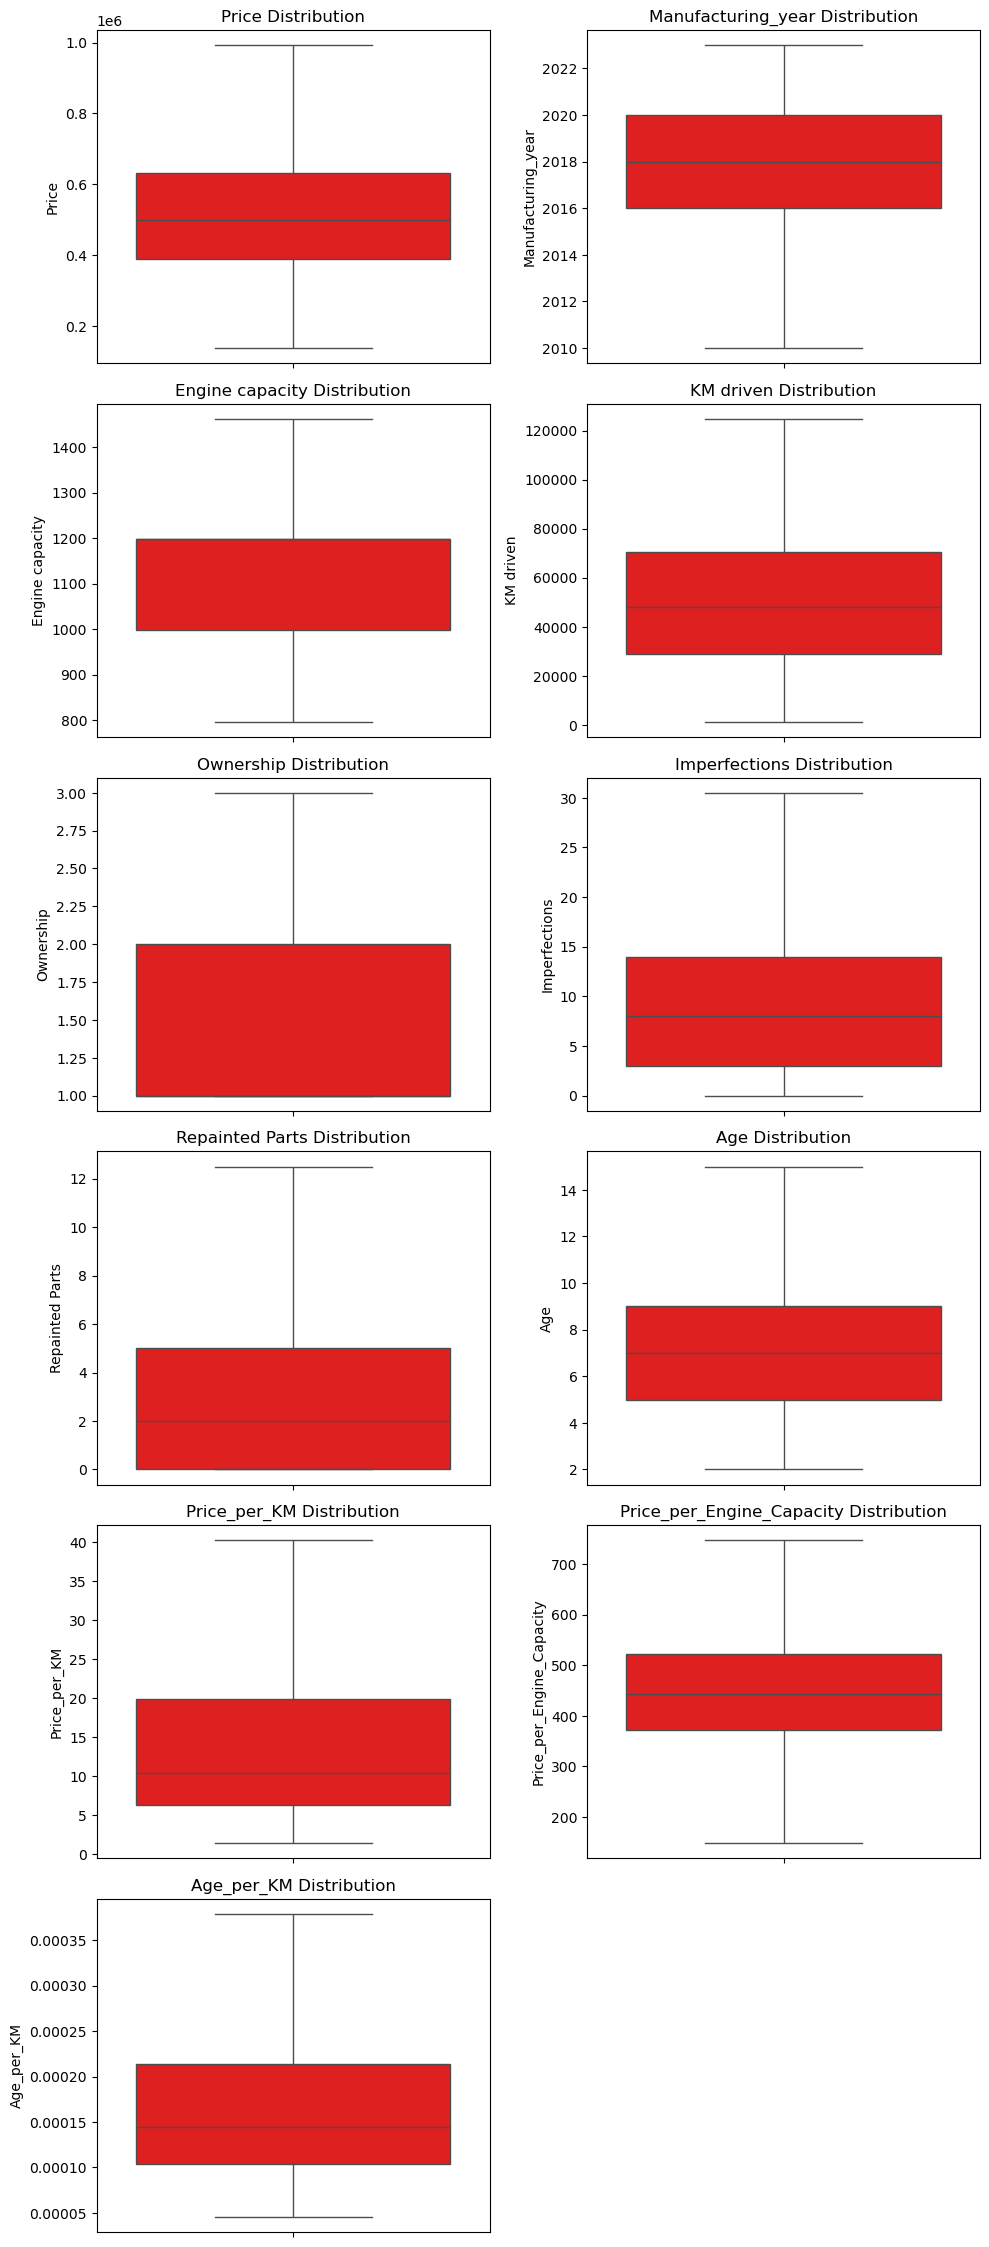

In [16]:
# Apply outlier removal
ds[numeric_cols] = remove_outliers(ds[numeric_cols])

# Boxplot after outlier removal
plt.figure(figsize=(10, 30))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(ds[col], color="red")
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

## Data Visualization

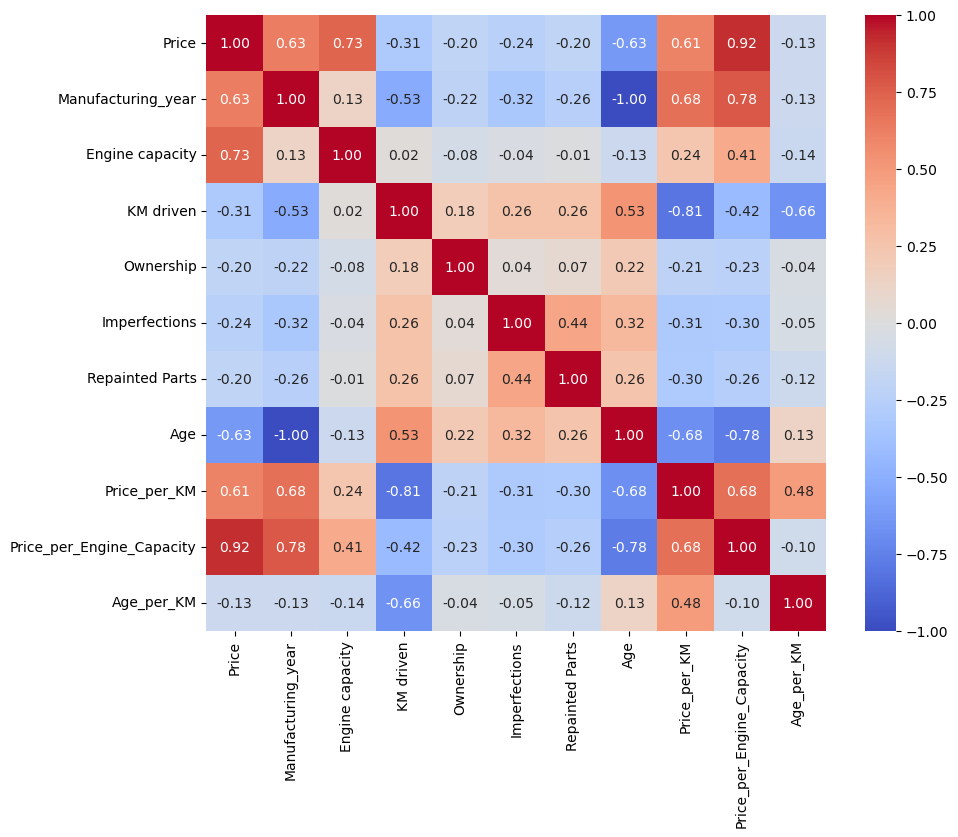

In [17]:
# Correlation heatmap
corr_matrix = ds[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

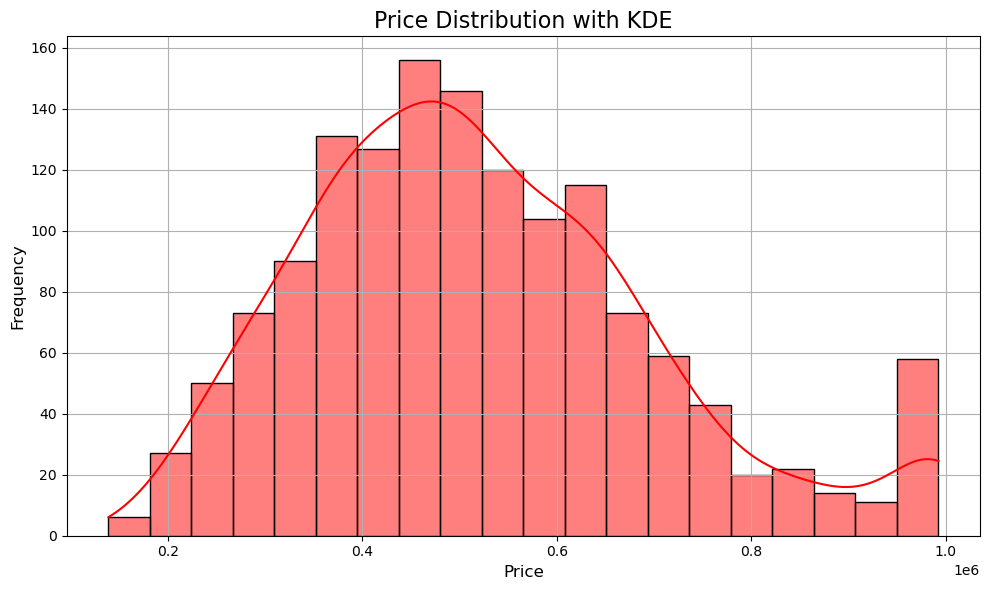

In [18]:
# Price Distribution with KDE
plt.figure(figsize=(10, 6))
sns.histplot(ds["Price"], bins=20, kde=True, color="red", edgecolor='black')
plt.title('Price Distribution with KDE', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

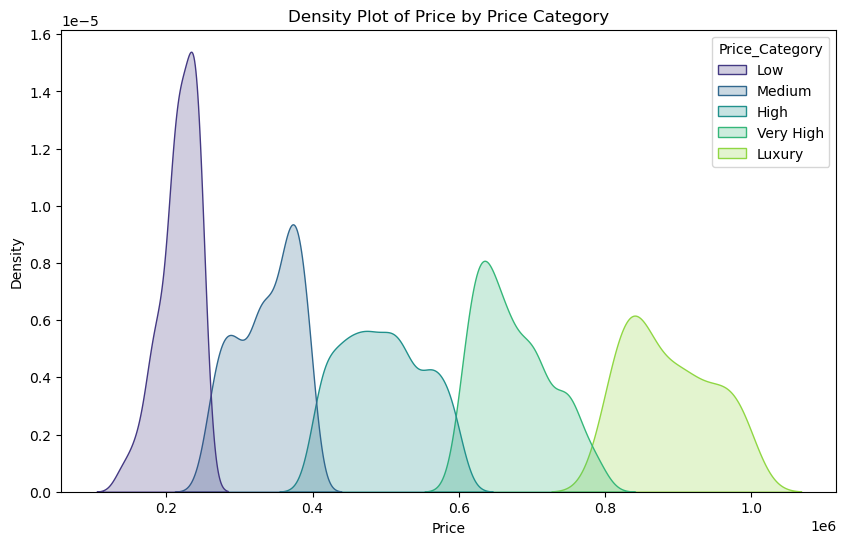

In [19]:
# Price Density Distribution by Category
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ds, x='Price', hue='Price_Category', fill=True, common_norm=False, palette='viridis')

plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot of Price by Price Category")
plt.show()

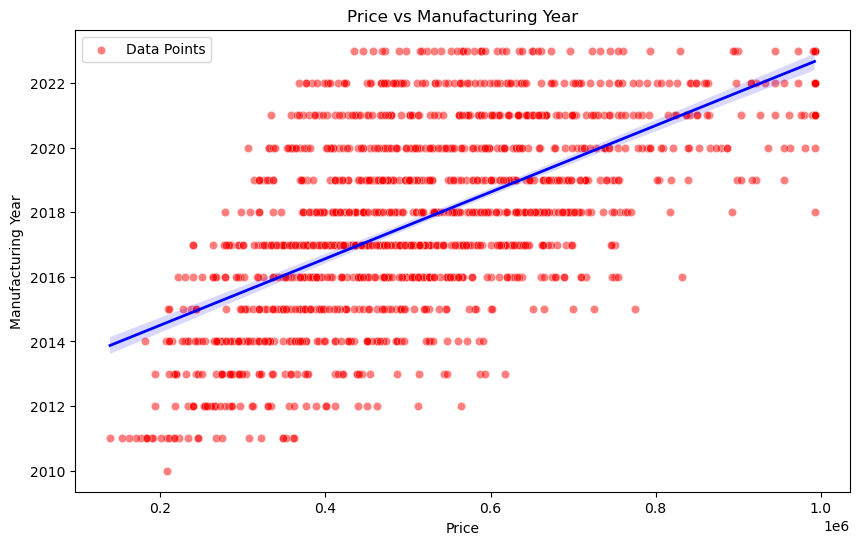

In [21]:
# Scatter plot for Price vs Manufacturing Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds["Price"], y=ds["Manufacturing_year"], color="red", marker="o", alpha=0.5, label="Data Points")
sns.regplot(x=ds["Price"], y=ds["Manufacturing_year"], scatter=False, color="blue", line_kws={"linewidth": 2, "label": "Trend Line"})
plt.xlabel("Price")
plt.ylabel("Manufacturing Year")
plt.title("Price vs Manufacturing Year")
plt.legend()
plt.show()

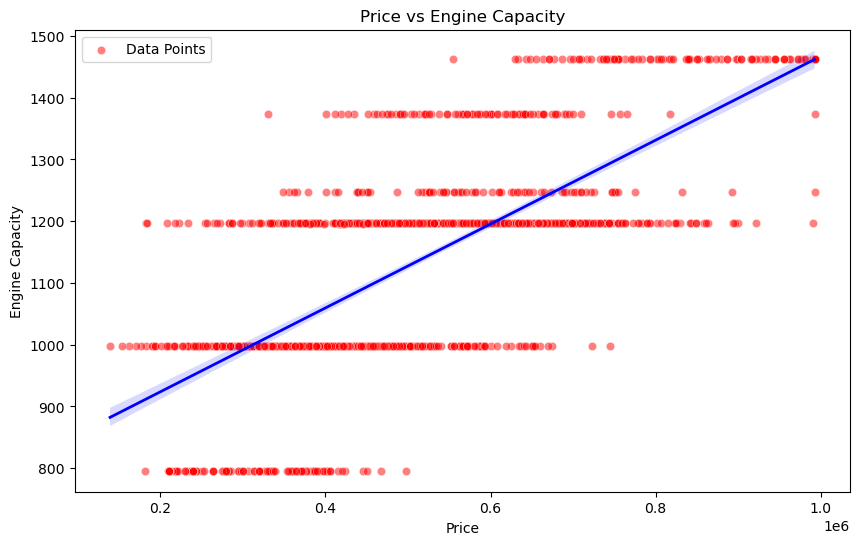

In [22]:
# Scatter plot for Price vs Engine Capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds["Price"], y=ds["Engine capacity"], color="red", marker="o", alpha=0.5, label="Data Points")
sns.regplot(x=ds["Price"], y=ds["Engine capacity"], scatter=False, color="blue", line_kws={"linewidth": 2, "label": "Trend Line"})
plt.xlabel("Price")
plt.ylabel("Engine Capacity")
plt.title("Price vs Engine Capacity")
plt.legend()
plt.show()

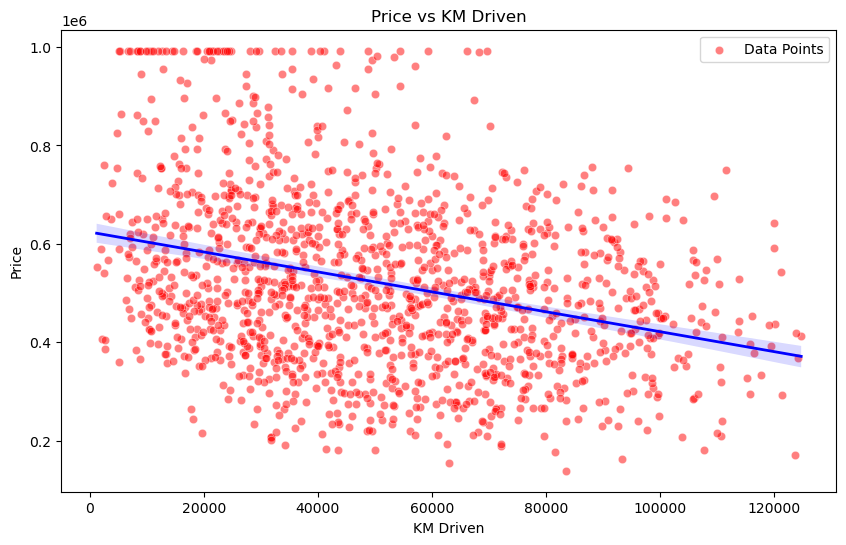

In [23]:
# Scatter plot for Price vs KM Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds["KM driven"], y=ds["Price"], alpha=0.5, color="red", label="Data Points")
sns.regplot(x=ds["KM driven"], y=ds["Price"], scatter=False, color="blue", line_kws={"linewidth": 2, "label": "Trend Line"})
plt.xlabel("KM Driven")
plt.ylabel("Price")
plt.title("Price vs KM Driven")
plt.legend()
plt.show()

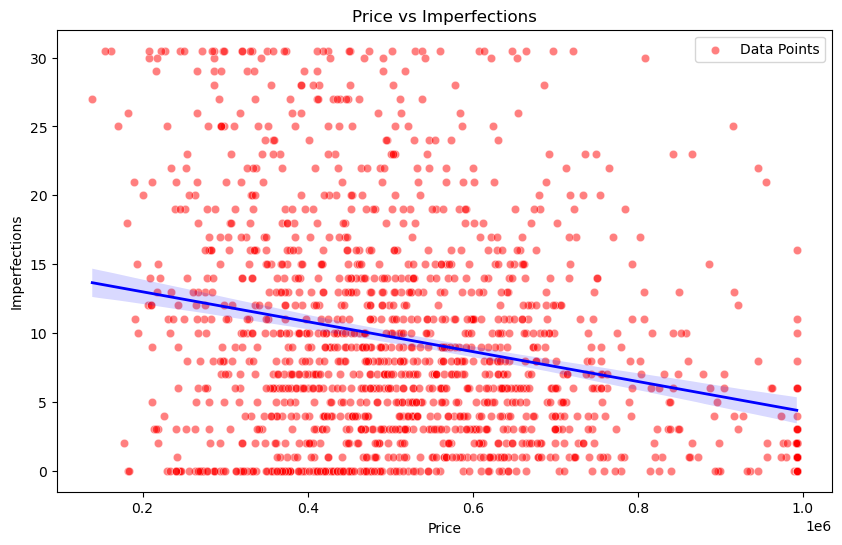

In [24]:
# Scatter plot for Price vs Imperfections
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds["Price"], y=ds["Imperfections"], color="red", marker="o", alpha=0.5, label="Data Points")
sns.regplot(x=ds["Price"], y=ds["Imperfections"], scatter=False, color="blue", line_kws={"linewidth": 2, "label": "Trend Line"})
plt.xlabel("Price")
plt.ylabel("Imperfections")
plt.title("Price vs Imperfections")
plt.legend()
plt.show()

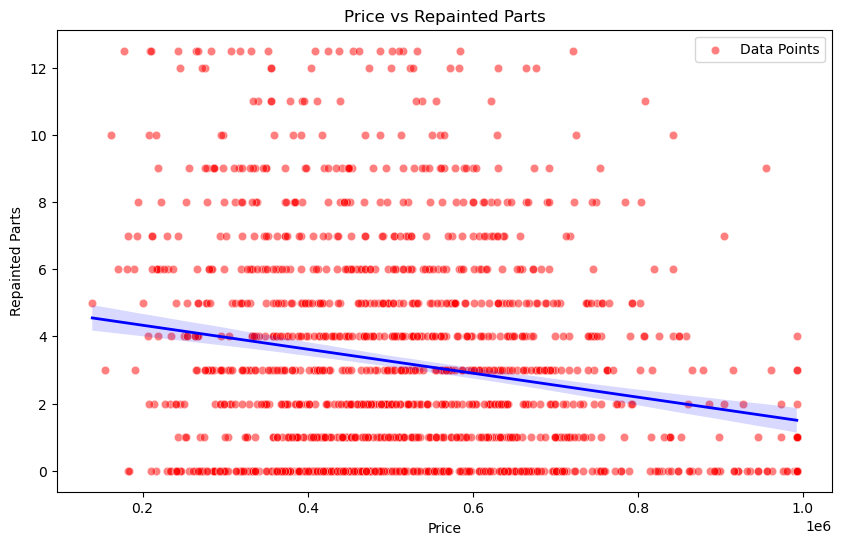

In [25]:
# Scatter plot for Price vs Repainted Parts
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds["Price"], y=ds["Repainted Parts"], color="red", marker="o", alpha=0.5, label="Data Points")
sns.regplot(x=ds["Price"], y=ds["Repainted Parts"], scatter=False, color="blue", line_kws={"linewidth": 2, "label": "Trend Line"})
plt.xlabel("Price")
plt.ylabel("Repainted Parts")
plt.title("Price vs Repainted Parts")
plt.legend()
plt.show()

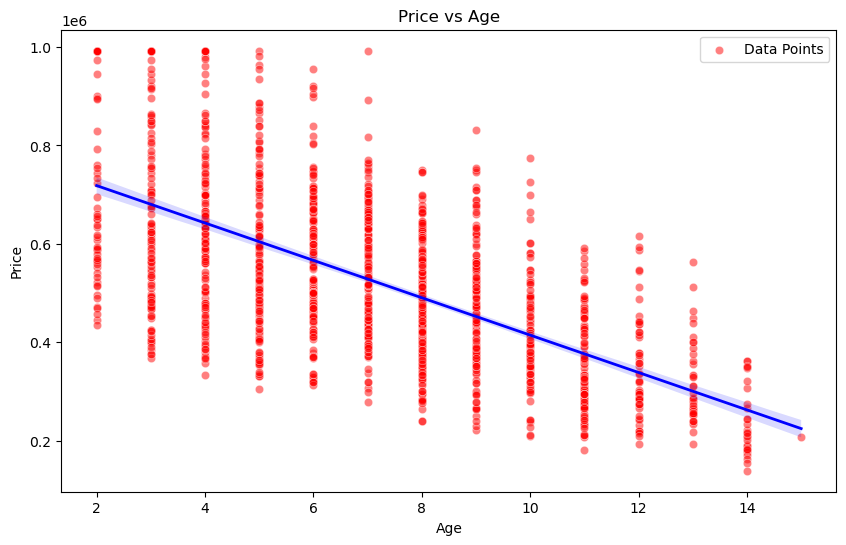

In [26]:
# Scatter plot for Price vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ds["Age"], y=ds["Price"], color="red", marker="o", alpha=0.5, label="Data Points")
sns.regplot(x=ds["Age"], y=ds["Price"], scatter=False, color="blue", line_kws={"linewidth": 2, "label": "Trend Line"})
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Price vs Age")
plt.legend()
plt.show()

## Data Preparation (Features and Target)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
# Target variable
y = ds['Price']

# Independent variables (excluding Price, Price_Category, Model Name)
X = ds.drop(columns=['Price', 'Price_Category', 'Model Name'])
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training and Evaluation of Models

In [29]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

In [30]:
# Random Forest Regressor Model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [31]:
# Gradient Boosting Regressor Model
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)

In [32]:
# Performance metrics
def print_metrics(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("Gradient Boosting", y_test, y_pred_gb)

Linear Regression - MAE: 12323.507876638037, MSE: 300584599.24666053, RMSE: 17337.375788932433, R²: 0.9898757783209339
Random Forest - MAE: 3765.7439446366784, MSE: 88730181.83391003, RMSE: 9419.669942939085, R²: 0.9970114103225456
Gradient Boosting - MAE: 4820.929211097067, MSE: 70075348.29428118, RMSE: 8371.101976100947, R²: 0.997639738156422


In [33]:
results_ds = pd.DataFrame({
    'True Values (y_test)': y_test,
    'Linear Regression Predictions (y_pred_lr)': y_pred_lr,
    'Random Forest Predictions (y_pred_rf)': y_pred_rf,
    'Gradient Boosting Predictions (y_pred_gb)': y_pred_gb
})

# Display the first 10 rows
results_ds.head(10)

,True Values (y_test),Linear Regression Predictions (y_pred_lr),Random Forest Predictions (y_pred_rf),Gradient Boosting Predictions (y_pred_gb)
413,331000.0,320006.843086,330310.0,326660.690203
316,708000.0,710223.069098,707620.0,701527.184218
1034,746000.0,731784.581489,704770.0,739149.975743
65,429000.0,442622.456617,429640.0,436007.680469
1024,329000.0,321929.324756,330610.0,334057.387323
661,554000.0,578922.318065,523360.0,535584.882762
175,490000.0,497288.967441,489300.0,488079.257153
824,863000.0,850632.190598,867950.0,859246.680167
649,301000.0,285041.500964,298490.0,293440.658856
231,424000.0,458493.889175,433500.0,431788.005921
